### MA3402 Estadística
## Tarea 1, Entrega 2: Conociendo los Modelos Estadísticos.

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Claudio López, Fabián A. Ulloa y Catalina Lizana.

**Estudiantes:** Benjamín Ibarra Alemany, Antonia Valenzuela Castro, Bianca Zamora Araya.

## Antes de comenzar
Si aún no lo han hecho, miren la playlist de _Introducción a R para estadística_ que hemos dejado disponible en UCursos (https://www.youtube.com/playlist?list=PLcnkc7YRWgxbB_SIm3efkoRIRyxP0N-IK).

Por otro lado, recuerden hacer la entrega 1 ! Esta les ayudará a familiarizarse con las herramientas de R y es una muy buena base para lo que tendrán que hacer aquí !


# Estimando Parámetros

### Una situación (relativamente) real

Uno de los fenómenos que tradicionalmente podemos modelar usando modelos probabilísticos (más específicamente, las llamadas _cadenas de Markov_) son los problemas de _colas_.

Por ejemplo, imaginemos que a un call center llegan llamadas a una _tasa_ $\lambda$ (algo así como que llegan aleatoriamente $\lambda$ llamadas por segundo). Este call center es muy tecnológico, y usando modelos de NLP (como GPT4) y de _text-to-speech_, puede atender autónomamente a (prácticamente) **infinitos** clientes a la vez. En particular, a cada llamada que llega, siempre se le puede asignar un _robot_ que esté libre para atenderlo). Digamos que cada robot es capaz de resolver la llamada a una tasa $\mu$. Como todas están en paralelo, en la práctica, si tengo $k$ llamadas activas, estas _decaen_ a tasa $k\mu$ (i.e. la _velocidad_ a la que decae globalmente el número de llamadas depende de la cantidad de llamadas activas y de la tasa de decaimiento de cada una individualmente).

Este fenómeno se modela con lo que llamamos una _cadena de Markov a tiempo continuo_ (más detalles en su próximo curso). Si quieren un bonito video "introductorio" a este tipo de ideas, les recomiendo el siguiente: https://www.youtube.com/watch?v=rBIQmwaoZfs&ab_channel=Mathemaniac (aunque el problema es ligeramente distinto al que trabajamos aquí; en este caso, estamos lidiando con lo que se conoce como una cola M/M/$\infty$).

Muy bonito el modelo y todo, pero en la práctica el gerente del call center va querer saber cómo se ven _en promedio_ la cantidad de líneas que se están ocupando (en base a eso, podrá estimar cuánto le va a costar la mantención del servicio, cuánto más rápida debe ser la IA, etc,etc).

Lo bueno del modelo, es que se puede calcular (lo harán en el curso de Markov) que _en el equilibrio_ (o _a largo plazo_ o _en promedio_) la cantidad de líneas que se están usando en el servicio sigue una distribución de **Poisson**. Más precisamente, si $X$ es la v.a. que modela la cantidad de líneas en uso _en el equilibrio_ (y que, por lo mismo, toma valores en $\mathbb{N}$), entonces, se sabe que $X \sim \mathrm{Poisson}(\frac{\lambda}{\mu})$ (donde $\lambda$ era la tasa a la que _llegan las llamadas_ y $\mu$ era la _velocidad_ con la cual la IA era capaz de resolverlas).

Genial! Porque ese tipo de variables las conocemos, y podemos empezar a calcular cosillas con ellas...

### Calculemos cosillas (viejas)

**TLDR:** queremos entender $X \sim \mathrm{Poisson}\left(\frac{\lambda}{\mu}\right)$ la cantidad de llamadas activas que hay _en equilibrio_ en el call center (donde $\lambda$ era la tasa a la que _llegan las llamadas_ y $\mu$ era la _velocidad_ con la cual la IA era capaz de resolverlas). En la práctica, esto lo haremos con _observaciones_ i.i.d. de la cantidad de llamadas activas en el call center.

Comencemos simulando una muestra i.i.d. de $n$ realizaciones de una v.a. $\texttt{poisson} \sim \mathrm{Poisson}(\nu)$, con $\nu >0$ (donde aquí, $\nu = \frac{\lambda}{\mu}$).

**1.-** Antes de empezar a simular, calcule la cantidad _promedio_ de líneas que estarán ocupadas en el _equilibrio_ bajo este modelo. Proponga un estimador para esta cantidad y diga si es insesgado (o no) y si es consistente (o no). Repita el procedimiento para algún estimador de la _varianza_ de la cantidad de líneas ocupadas en _equilibrio_.

**Respuesta:**

Para determinar si es insesgado, se estudia el sesgo (_bias_) $b_{\nu}(T_{n})$, si es nulo entonces no tiene sesgo, y en caso contrario tiene un sesgo; para un estimador $T_{n}$ se define por:

\begin{equation*}
  b_{\nu}(T_{n})=\mathbb{E}_{\nu}(T_{n})-\nu.
\end{equation*}

Para estudiar la consistencia, por definición se puede ver si el estimador converge casi seguramente o en probabilidad al parámetro, siendo fuerte y débil, respectivamente.







Dadas $(X_{k})_{k=1}^{n}$ realizaciones de una v.a, donde $(X_{k})\sim \textrm{Poisson}(\nu)$, la cantidad promedio de líneas que estarán ocupadas viene dada por el valor esperado o la esperanza $\mathbb{E}(X_{1})=\nu$, donde $\nu$ viene dado por $\nu=\tfrac{\lambda}{\mu}$, donde $\lambda$ corresponde a la tasa de llamadas activas por segundo, y $\mu$ la velocidad con que la IA la resuelve. Para encontrar el parámetro $\nu$, se propone el siguiente estimador

\begin{equation*}
T_{n}=\hat{\nu}=\dfrac{1}{n}\sum_{k=1}^{n} X_{k}.
\end{equation*}

En efecto,

\begin{align}
  b_{\nu}(T_{n})&=\mathbb{E}_{\nu}\left(\dfrac{
    1}{n}\sum_{k=1}^{n} X_{k}\right)-\nu\\
    &= \dfrac{1}{n}\sum_{k=1}^{n}\mathbb{E}_{\nu}\left(X_{k}\right)-\nu\\
    &= \dfrac{1}{n}n\cdot \nu -\nu\\
    &=0.
\end{align}

Donde la segunda igualdad se obtuvo por linealidad de la esperanza.

Como $b_{\nu}(T_{n})=0$, el estimador es insesgado.

Si consideramos ahora una sucesión $(X_{k})_{k=1}^{n}$ de realizaciones i.i.d., con esperanza $\mathbb{E}(X_{1})=\nu$, por Ley de los Grandes Números Fuerte,
\begin{equation*}
 \overline{X}_{n}= \dfrac{1}{n}\sum_{k=1}^{n}X_{k} \overset{\textrm{c.s.}}{\underset{n}{\longrightarrow} } \nu,
\end{equation*}

como definimos $T_{n}=\overline{X}_{n}$, se concluye que $T_{n}$ es un estimador **fuertemente**  consistente.


Para la varianza, consideremos el siguiente estimador,

\begin{equation*}
    Y_{n}= \hat{\sigma}^{2}= \dfrac{1}{n}\sum_{k=1}^{n}(X_{k} - \overline{X}_{n})^{2}.
\end{equation*}

Vemos que,

\begin{align}
    \mathbb{E}_{\sigma^{2}}(Y_{n})&=  \mathbb{E}_{\sigma^{2}}\left(\dfrac{1}{n}\sum_{k=1}^{n}(X_{k} - \overline{X}_{n})^{2}\right)\\
      &= \dfrac{1}{n} \sum_{k=1}^{n} \mathbb{E}[(X_{k}-\overline{X}_{n})^{2}]\\
      &= \dfrac{1}{n}\sum_{k=1}^{n}\mathbb{E}[(X_{k}-\nu+\nu-\overline{X}_{n})^{2}]\\
      &= \mathbb{E}\left[\dfrac{1}{n}\sum_{k=1}^{n} (X_{k}-\nu)^{2}\right]+ 2\mathbb{E}\left[\dfrac{1}{n}\sum_{k=1}^{n} (X_{k}-\nu)(\nu-\overline{X}_{n})\right]+\mathbb{E}\left[(\nu-\overline{X}_{n})^{2}\right],\quad \nu=\mathbb{E}(\overline{X}_{n})=\operatorname{Var}(X_{1})\\
      &= \operatorname{Var}(X_{1})-2\mathbb{E}\left[(\nu-\overline{X}_{n})^{2}\right]+\mathbb{E}\left[(\nu-\overline{X}_{n})^{2}\right]\\
      &= \operatorname{Var}(X_{1})-\operatorname{Var}(\overline{X}_{n})\\
      &=\operatorname{Var}(X_{1})\left(1-\dfrac{1}{n}\right) = \operatorname{Var}(X_{1})\left(\dfrac{n-1}{n}\right) <\operatorname{Var}(X_{1})=\nu.
\end{align}

Luego, $Y_{n}$ es un estimador sesgado, pero es asintóticamente insesgado (pues cuando $n → \infty$ el sesgo se anula). Por otro lado, basta tomar $S_{n}^{2}=\dfrac{n}{n-1}Y_{n}$ para obtener un estimador insesgado de la varianza.

Luego, notar que $\mathbb{E}_{\sigma^{2}}\left( S_{n}^{2} \right) = \mathbb{E}_{\sigma^{2}}\left( \dfrac{n}{n-1} Y_{n} \right) = \dfrac{n}{n-1}\dfrac{n-1}{n} \operatorname{Var}(X_{1}) =\operatorname{Var}(X_{1})$, por lo que efectivamente esta corrección lo hace insesgado.

Como sospechamos que $S_{n}^{2}$ es **débilmente consistente**, usamos la desigualdad de Chebyshev/Markov,

\begin{align}
    \mathbb{P}(|S_{n}^{2}-\nu|>\varepsilon)&\leq \dfrac{1}{\varepsilon^{2}}\mathbb{E}_{\nu}[S_{n}^{2}-\nu]^{2}\\
    &= \dfrac{1}{\varepsilon^{2}}\left( \operatorname{Var}_{\nu}[S_{n}^{2}]+ \mathbb{E}_{\nu}[S_{n}^{2}-\nu]^{2}\right).
\end{align}
 Luego, como ser insesgado es más fuerte que ser asintóticamente insesgado, vemos que

\begin{equation*}
   \lim_{n\to \infty} \mathbb{E}_{\sigma^{2}}[S_{n}^{2}]=\nu^{2}.
\end{equation*}

 Por otro lado, como buscamos estudiar el comportamiento del estimador en el límite, si consideramos $n$ suficientemente grande, sabemos por el teorema central del límite que $\overline{X}_{n}\sim \mathcal{N}\left(\nu,\tfrac{\nu}{n}\right)$, y con ello, la varianza de la varianza muestral es aproximadamente:

 \begin{equation*}
\operatorname{Var}(S_{n}^{2})\approx \dfrac{2\nu^{2}}{n-1}.
 \end{equation*}

 Al tomar límite, vemos que $\operatorname{Var}(S_{n}^{2})\underset{n\to \infty}{\longrightarrow} 0$. De esta manera, se deduce

 \begin{equation*}
    \mathbb{P}(|S_{n}^{2}-\nu|>\varepsilon)\underset{n\to \infty}{\longrightarrow} 0.
 \end{equation*}
  
  En virtud de esto y de que $S_{n}^{2}$ tiene, asintóticamente, de media al parámetro y varianza nula, en virtud del teorema,, $S_{n}^{2}$ es al menos **débilmente** consistente.

**2.-** ¿Será capaz el gerente de identificar individualmente cada parámetro $\lambda$ y $\mu$ del modelo de colas? Busque el concepto de _identificabilidad_ de un modelo estadístico y explique (muy brevemente) cómo se aplica aquí.

**Respuesta:**

Según el apunte del curso (página 9) un modelo paramétrico $\mathcal{M}_{\theta} = \{ P_{\theta} : \theta \in \Theta\}$ es identificable si es que la regla de asignación $\theta \mapsto P_{\theta}$ es inyectiva, esto quiere decir que para distintas distribuciones de probabilidad, deben ser necesariamente de distintos parámetros. En virtud de esto, el gerente no podría identificar individualmente cada parámetro $\lambda$ y $\mu$ del modelo de colas, pues hay distintas maneras de obtener el mismo valor, lo cual hace perder la inyectividad, por ejemplo, $\dfrac{40}{2} = \dfrac{100}{5}$, pero $40 \neq 100$ y $2\neq5$.

**3.-** Digamos que las llamadas llegan a una velocidad de $\lambda = 4$, y que la IA es capaz de responderlas a una tasa $\mu = 2$. Genera una muestra de $n = 10000$ v.a.s $\texttt{poisson}$ con estos parámetros. Guárdala en un dataframe $\texttt{df}$.

In [1]:
# Respuesta: Generamos un df con 10000 realizaciones de v.a.s poisson de parámetro 4/2.
N=10000
poissons <- rpois(n=N, lambda=2)
df <- data.frame(Poisson=poissons)
df


Poisson
<int>
1
0
1
1
2
2
1
2
3


**4.-** Ploteen un histograma de su muestra.

In [2]:
# Para instalar ggplot2
if(!(require(ggplot2))){install.packages('ggplot2')}
library(ggplot2)


Loading required package: ggplot2



In [3]:
# Función para plotear
my.hist <- function(df, col, binwidth=0.1, xmin=-4, xmax=4, name){
    p <- ggplot(df, aes(x=!! sym(col))) +
    geom_histogram(aes(y=after_stat(density)), colour="black", fill="white", binwidth = binwidth) +
    geom_density(alpha=.2, fill="#FF6666") +
    geom_vline(aes(xintercept=mean(!!sym(col))), color="green", linetype="dashed", linewidth=1) +
    labs(
        title= paste('Histograma de la distribución', name),
        x = "Valor",
        y = "Frecuencia"
    ) +
    theme(plot.title = element_text(h=0.5, face = "bold.italic")) +
    coord_cartesian(xlim = c(xmin, xmax))
    return(p);
}


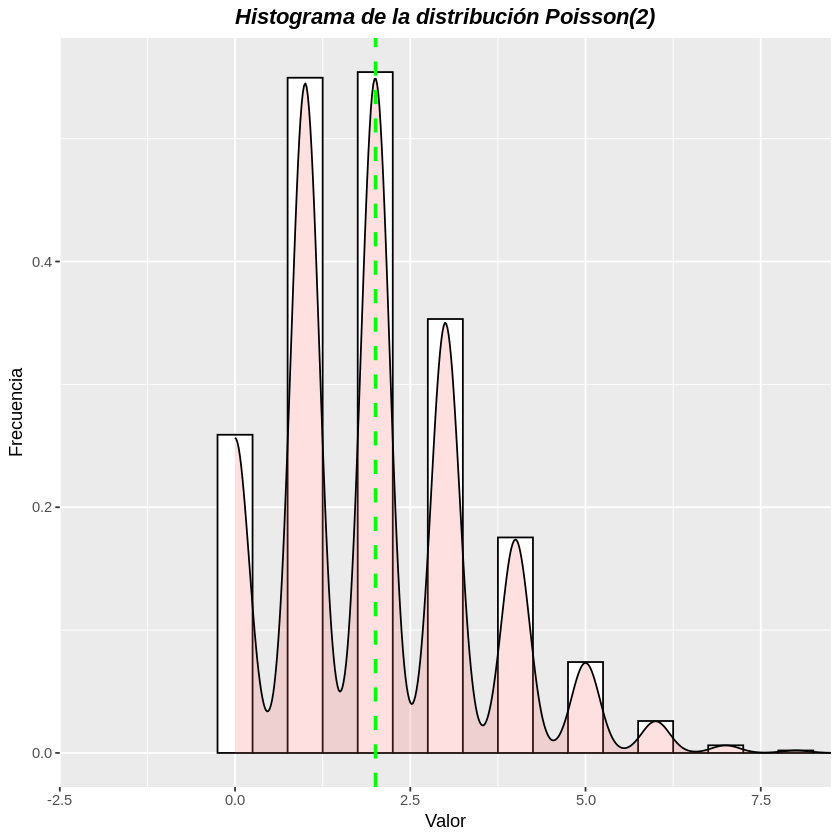

In [4]:
# Aquí plotear histogramas
histpois <- my.hist(df, 'Poisson', binwidth=0.5, xmin=-2, xmax= 8, 'Poisson(2)')
histpois

**5-**  Considere su estimador para el _promedio_ de llamadas que hay _en el equilibrio_: calcúlelo y grafique si converge (o no) al valor real de dicho promedio.

En el equilibrio, la cantidad de llamadas que se realizan se modelan por la M.A.S. $(X_{k})_{k=1}^{n}$ Poisson de parámetro $\nu = \tfrac{\lambda}{\mu}$. Para estimar el promedio de llamadas que hay en el equilibrio, se utilizará el estimador ya estudiado en la parte 1. Como es el promedio empírico, trabajado en la entrega 1, se usará la misma construcción ya realizada.

In [5]:
# Estimar el promedio y la desviación estándar
r.avg <- cumsum(df)/seq_len(N)
prom <- mean(poissons)
#notar que se aplica la suma acumulada directamente al dataframe donde se suma por columnas (barriendo filas)
#es importante actualizar el n mientras se recorren las filas, para esto se ocupa el vector que almacena la secuencia N en [0..10000]

desvest <- sd(poissons)

In [6]:
print('El promedio se estima por: ')
print(prom)
print('La desviación estándar se estima por: ')
print(desvest)

[1] "El promedio se estima por: "
[1] 2.0041
[1] "La desviación estándar se estima por: "
[1] 1.408787


In [7]:
# Función para plotear
my.cvg <- function(df, col, prom=0, ymin=0, ymax=1, name){
    pp <- ggplot(data=df, aes(x= as.numeric(row.names(df)), y=!!sym(col))) +
    geom_line() +
    geom_point() +
    labs(
        title= paste('Evolución del promedio Empírico \n en Función del Número de Muestras', name),
        x = "N° de Muestras",
        y = "Valor"
    ) +
    geom_hline(yintercept=prom, color="red") +
    coord_cartesian(ylim = c(ymin, ymax))
    return(pp);
}

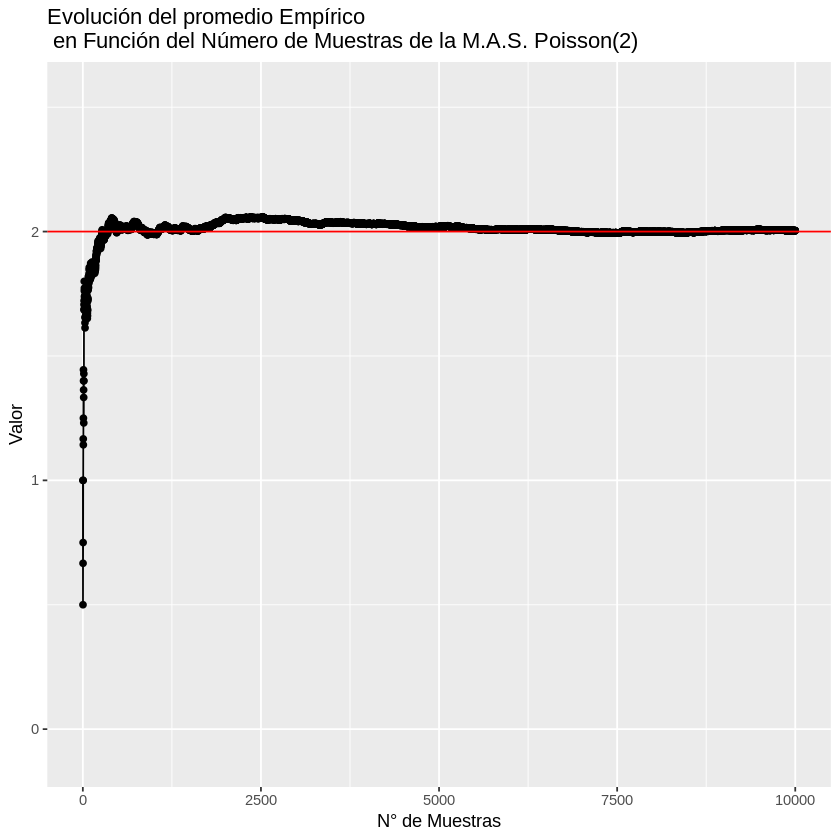

In [8]:
my.cvg(r.avg, 'Poisson', prom=2, ymin=-0.1, ymax=2.55, 'de la M.A.S. Poisson(2) ')

A partir del gráfico se observa que el promedio de la M.A.S. coincide con el resultado teórico, pues corresponden a variables aleatorias poisson de parámetro $\nu$, y es conocido que su media viene dada precisamente por $\nu$, en este caso $\nu=2$.

### Calculemos cosillas (nuevas)

Al gerente del call center le interesaría calcular la probabilidad de que _en equilibrio_ hayan exactamente $0$ llamadas activas (esto le permitirá estimar qué fracción del tiempo podrá _ahorrarse el costo de usar AWS para correr la IA_). Denotémosla como $g(\nu) $

**6.-** Calcule el valor de $g(\nu)$ para cualquier $\nu >0$.

**Respuesta:**
En el _equilibrio_ , por el contexto dado, sabemos que las llamadas se pueden modelar como una muestra aleatoria simple $(X_{k})_{k=1}^{n}$ poisson de parámetro $\nu=\tfrac{\lambda}{\mu}$. De este modo, podemos calcular fácilmente la probabilidad de que hayan exactamente $0$ llamadas activas, pues la probabilidad de masa viene dada por $P(X=k)=e^{-\nu}\tfrac{\nu^{k}}{k!}$.

\begin{equation*}
    g(\nu):=\mathbb{P}(X_{1}=0)= e^{-\nu}\dfrac{\nu^{0}}{0!}=e^{-\nu}.
\end{equation*}

**7.-** Buscaremos estimar el valor de $g(\nu)$ a través de los siguientes _estimadores_:

- $\hat{g}_1 = e^{- \overline{\texttt{poisson}}_n}$ (exponencial de -_el promedio_)
- $\hat{g}_2 = \frac{1}{n} \sum_{i=1}^n 1_{\{\texttt{poisson}_i = 0\}}$ (promedio de la _indicatriz_ de cuándo la v.a. fue 0).
- $\hat{g}_3 = (1-\frac{1}{n})^{n \cdot\overline{\texttt{poisson}}_n}$ (algo así como la aproximación de la exponencial que queremos).

Determine cuáles de estos son (o no) insesgados. Decida si es posible transformar aquellos que son sesgados en insesgados de alguna forma.

**Respuesta:**

En primer lugar, se quiere estudiar si el estimador $\hat{g}_{1} = e^-\overline{X}_{n}$ es sesgado o no. Si fuese insesgado, entonces $b_{g(\nu)}(\hat{g}_{1}) = 0 \iff \mathbb{E}_{g(\nu)} - g(\nu) = 0$, por lo que se calculará $\mathbb{E}_{g(\nu)}$ y se verá si se parece a $g(\nu)$.

\begin{align}
  \mathbb{E}_{g(\nu)} \left(\hat{g}_{1}\right) &= \mathbb{E}_{g(\nu)} \left(e^{-\overline{X}_{n}}\right)\\
  &= \mathbb{E}_{g(\nu)} \left(e^{-\left( \frac{1}{n} \displaystyle \sum_{i=1}^{n} X_{i} \right)}\right)\\
  &=  \mathbb{E}_{g(\nu)} \left(e^{-\frac{1}{n}X_{1}} e^{-\frac{1}{n}X_{2}} \cdots e^{-\frac{1}{n}X_{n}}\right)\\
  &=  \mathbb{E}_{g(\nu)} \left( \prod_{i=1}^{n} e^{-\frac{1}{n}X_{i}}\right)\\
\end{align}

Donde la penúltima igualdad se obtiene por propiedades de exponencial, y en la úlitma se utilizó una notación más cómoda con pitatoria. Pero $(X_{i})_{i=1}^{n}$ es una m.a.s. por lo que es i.i.d., en particular independiente así que $X_{i} \perp x_{j} \forall i\neq j$, en consecuencia las variables aleatorias definidas por ellas $e^{-\frac{1}{n}X_{i}} \perp e^{-\frac{1}{n}X_{j}}$, así que se puede utilizar la caracterización de independencia en la esperanza para reescribir el producto:

\begin{align}
  &= \prod_{i=1}^{n} \mathbb{E}_{g(\nu)} \left( e^{-\frac{1}{n}X_{i}}\right)
\end{align}

Notar que para una distribución de Poisson $P \sim Poisson(\beta)$, su función generadora de momentos es conocida y es de la forma $\mathbb{E}\left(e^{tP}\right) = e^{\beta\left(e^{t}-1\right)} =: M_{P}(t)$. En este caso, el argumento del producto iterado corresponde a una función generadora de momentos para una distribucción poisson de parámetro $\nu$ y se usa $t=-\frac{1}{n}$. Sigue que $\mathbb{E}_{g(\nu)} \left( e^{-\frac{1}{n}X_{i}}\right) = e^{\nu \left(e^{-\frac{1}{n}} -1\right)}$. Como se multiplica $n$ veces un mismo valor que es fijo, no depende del índie $i$, entonces el resutado anterior es:

\begin{align}
  &= ne^{\nu \left(e^{-\frac{1}{n}} -1\right)} \neq e^{\nu}
\end{align}

Por lo anterior, tiene sesgo (incluso si $n → \infty$, entonces la esperanza del estimador no coincide con el parámetro, así que tampoco es asintóticamente insesgado).










En segundo lugar, queremos estudiar el estimador $\hat{g}_2 = \frac{1}{n} \sum_{i=1}^n 1_{\{\texttt{poisson}_i = 0\}}$, este estimador es la suma de las veces que la v.a es igual a 0. Calculemos su esperanza:
\begin{align}
 \mathbb{E}\left(\frac{1}{n} \sum_{i=1}^{n} \mathbf{1}\{X_i = 0\}\right)
 &= \frac{1}{n}\sum_{i=1}^{n} \mathbb{E}\left[\mathbf{1}\{X_i = 0\}\right]\\
 &= \frac{1}{n}\sum_{i=1}^{n} \mathbb{P}(X_i = 0)\\
 &= \frac{1}{n} \sum_{i=1}^{n} e^{-\nu} = e^{-\nu} = g(\nu)
\end{align}
Donde se uso la linealidad de la esperanza y que la esperanza de una indicatriz es la probabilidad del evento, además de que la v.a. es poisson. Por lo tanto el estimador es insesgado

Finalmente, vemos que $\hat{g}_{3}=\left(1-\tfrac{1}{n}\right)^{n\overline{X}_{n}}$ se puede escribir como,

\begin{equation*}
\hat{g}_{3}=\left(1-\dfrac{1}{n}\right)^{Y_{n}},\quad Y_{n}=\sum_{k=1}^{n}X_{n}.
\end{equation*}

Notemos que $Y_{n}$ es una variable aleatoria poisson de parámetro $n\nu$. Luego, calculamos la esperanza del estimador:

\begin{align}
    \mathbb{E}\left[\left(1-\dfrac{1}{n}\right)^{Y_{n}}\right]&= \sum_{k=1}^{n}\left(1-\dfrac{1}{n}\right)^{k}\cdot \mathbb{P}(Y_{n}=k)\\
    &= \sum_{k=1}^{n}\left(1-\dfrac{1}{n}\right)^{k}\cdot \dfrac{e^{-n\nu}(n\nu)^{k}}{k!}\\
    &= e^{-n\nu}\sum_{k=1}^{n}\left(\left(1-\dfrac{1}{n}\right)n\nu\right)^{k}\dfrac{1}{k!}.
\end{align}

Vemos que tenemos la aproximación en polinomio de Taylor de la exponencial.

\begin{equation*}
 \exp\left(\left(1-\dfrac{1}{n}\right)n\nu\right)=\sum_{k=1}^{n}\left(\left(1-\dfrac{1}{n}\right)n\nu\right)^{k}\dfrac{1}{k!}.
\end{equation*}

Con ello, para un $n$ suficientemente grande, podemos escribir,

\begin{align}
     \mathbb{E}\left[\left(1-\dfrac{1}{n}\right)^{Y_{n}}\right]&=e^{-n\nu}e^{\left(1-\tfrac{1}{n}\right)(n\nu)}\\
     &= e^{-\nu}\\
     &= g(\nu).
\end{align}

Con ello, podemos concluir que $\hat{g_{3}}$ es asintóticamente insesgado, dado que la aproximación hecha es válida para $n$ suficientemente grande.

**8.-** Simule cada uno de estos estimadores en base a las muestras de $\texttt{poisson}$ que ya tiene a mano. Grafique su evolución según el número de muestras. ¿Son consistentes los estimadores? ¿Qué tan relevante es el hecho que sean _insesgados_?

In [9]:
# Función para plotear 2
my.cvg2 <- function(df, col, prom=0, ymin=0, ymax=1, name){
    pp <- ggplot(data=df, aes(x= as.numeric(row.names(df)), y=!!sym(col))) +
    geom_line() +
    geom_point() +
    labs(
        title= paste('Evolución según el número de muestras del estimador', name),
        x = "N° de Muestras",
        y = "Valor"
    ) +
    geom_hline(yintercept=prom, color="red") +
    coord_cartesian(ylim = c(ymin, ymax))
    return(pp);
}

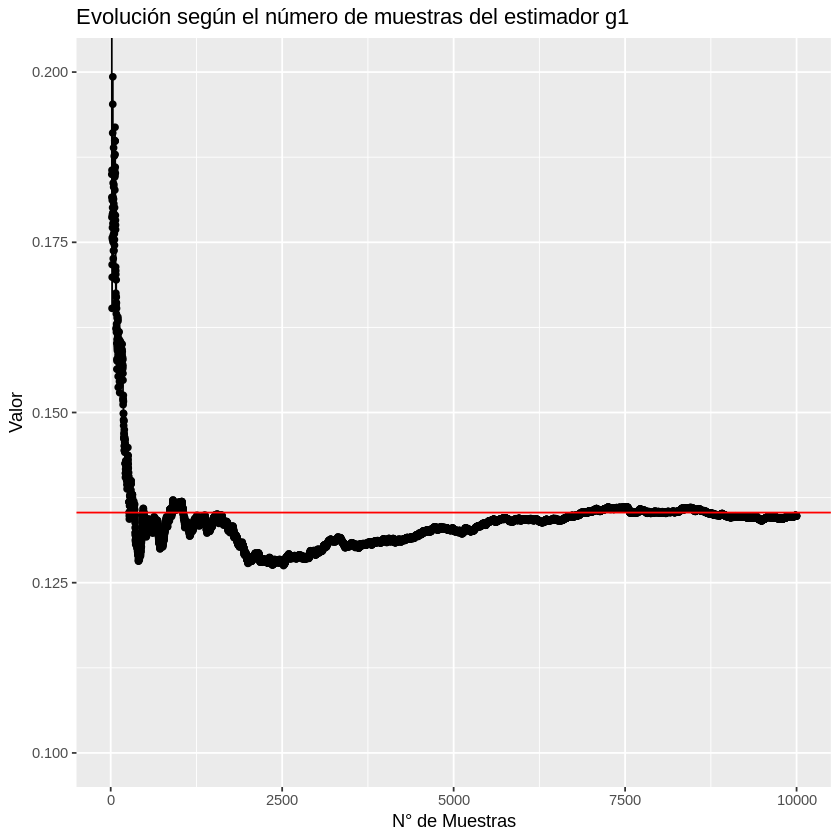

In [10]:
#Respuesta:
# Para el primer estimador
x1<-exp(-r.avg)
my.cvg2(x1, 'Poisson', prom=0.1353, ymin=0.1, ymax=0.2, 'g1')

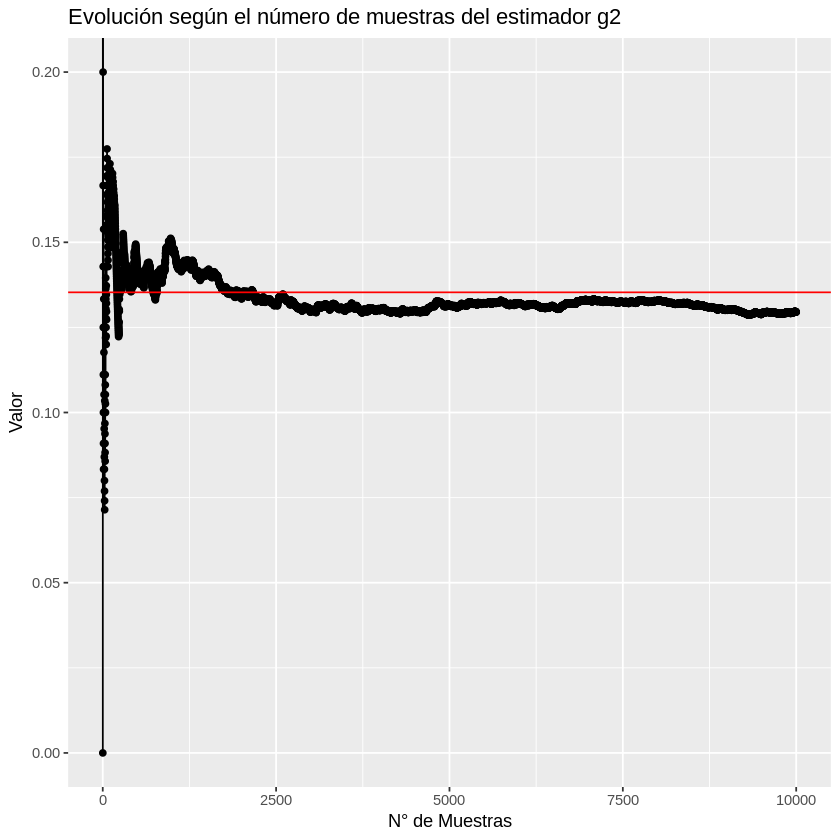

In [11]:
# Para el segundo estimador
# Para el segundo estimador
x5<-(cumsum(ifelse(df == 0, 1, 0)))
x6<- x5/seq_len(N)
x3<-data.frame(Indicpoiss = x6)
my.cvg2(x3, 'Indicpoiss', prom=0.1353, ymin=0, ymax=0.2, 'g2')


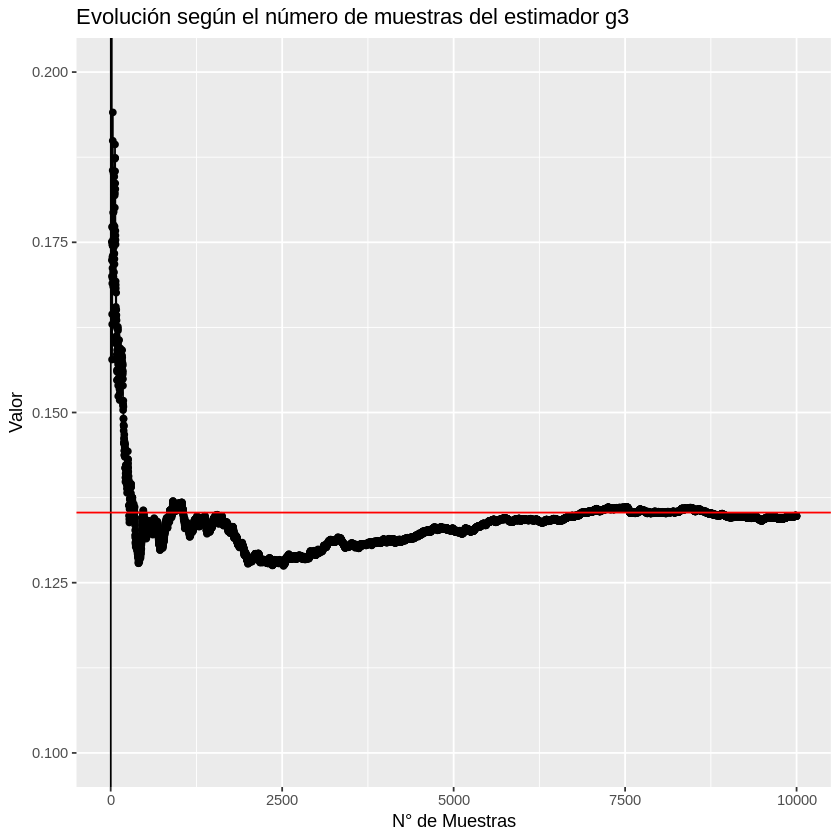

In [12]:
#Para el tercer estimador
e <- (1 - (1/seq_len(N)))^{seq_len(N)}
x5<- e^{cumsum(df)/seq_len(N)}
my.cvg2(x5, 'Poisson', prom=0.1353, ymin=0.1, ymax=0.2, 'g3')

¿Son consistentes los estimadores? ¿Qué tan relevante es el hecho que sean _insesgados_? \\


Para recapitular, $\hat{g}_{1}$ es sesgado y no consistente, $\hat{g}_{2}$ es insesgado y fuertemente consistente y $\hat{g}_{3}$ es asintóticamente insesgado, y débilmente consistente (su esperanza tiende al parámetro y el límite de su varianza tiende a 0). Es relevante el hecho de que sean insesgados, porque a medida que aumente el número de muestras si el estimador es insesgado, entonces la media de la distribución del estimador es igual al parámetro, así se puede hablar de cierta "uniformidad" al rededor del parámetro, esto se observa en $\hat{g}_{2}$, donde en rápidamente el estimador tiende al parámetro buscado, y no tanto en $\hat{g}_{3}$ donde las oscilaciones permanecen durante más muestras antes de converger. Por otro lado, $\hat{g}_{1}$, tiene sesgo, entonces el resultado se mantendría alejado del parámetro, incluso oscilando al rededor de él, pero sin converger.